In [ ]:
'''세계 음주 데이터 분식 '''

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path)
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
print(drinks.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
'''두 피처간 상관계구 구하기(대표적인 방법 : pearson)'''
corr=drinks[['beer_servings','wine_servings']].corr(method ='pearson')
print(corr)
# 1에 가까우면 깊은 상관관계

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [7]:
'''여러 피처간 상관관계'''
clos = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr2=drinks[clos].corr(method='pearson')
print(corr2)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [46]:
#!pip install seaborn


In [ ]:
'''상관관계 히트맵 시각화'''

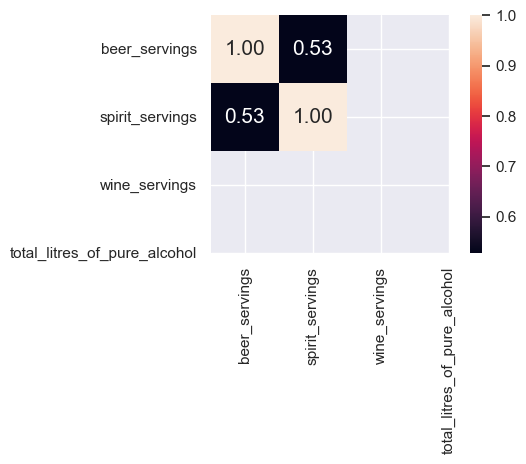

In [8]:
import seaborn as sns

cols_view = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
sns.set(font_scale=1)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

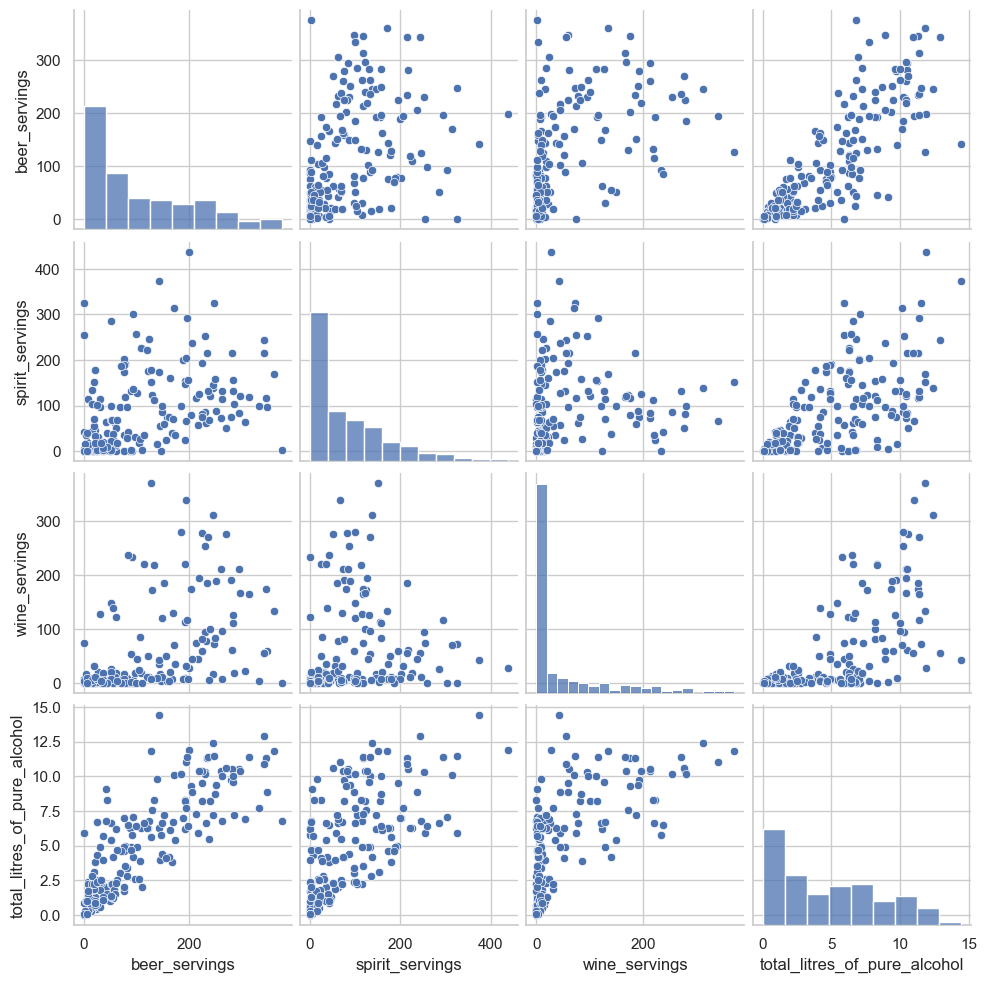

In [9]:
'''scatter plot'''
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height=2.5)
plt.show()

In [10]:
'''결측 데이터 전처리'''
print(drinks.isnull().sum())
print('**************************')
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
**************************
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [11]:
drinks['continent']=drinks['continent'].fillna('Others')

In [12]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,Others
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


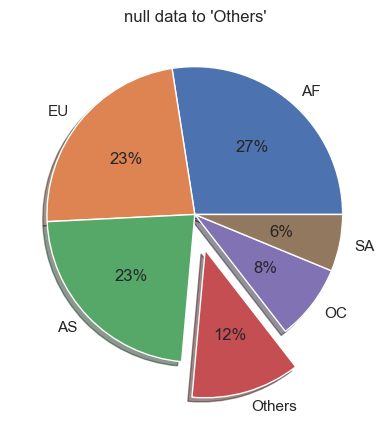

In [13]:
'''파이차트'''
con_name = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=con_name, autopct='%.0f%%',shadow=True)
plt.title('null data to \'Others\'')
plt.show()
# fracs1 을 기준으로 파이차트 만들기

In [14]:
'''대륙별 분석 spirit_servings의 평균 최소 최대 합계 '''
spirit= drinks. groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
spirit.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
Others,165.739130,68,438,3812


In [15]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
over_mean= continent_mean[continent_mean >= total_mean]
print(over_mean)

continent
EU        8.617778
Others    5.995652
SA        6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [16]:
# 평균 beer_servings가 가장 높은 곳 
beer_best = drinks.groupby('continent')['beer_servings'].mean().idxmax()

In [17]:
print(beer_best)

EU


In [18]:
beer_best = drinks.groupby('continent')['beer_servings'].mean().max()

In [19]:
print(beer_best)

193.77777777777777


In [24]:
drinks['continent'].isnull().sum() #널이 없는 

0

In [26]:
'''대륙별 spirit_servings의 평균 최소 최대 합계의 시각화'''
n_group=len(spirit.index)
means = spirit['mean'].tolist()
mins = spirit['min'].tolist()
maxs= spirit['max'].tolist()
sums=spirit['sum'].tolist()

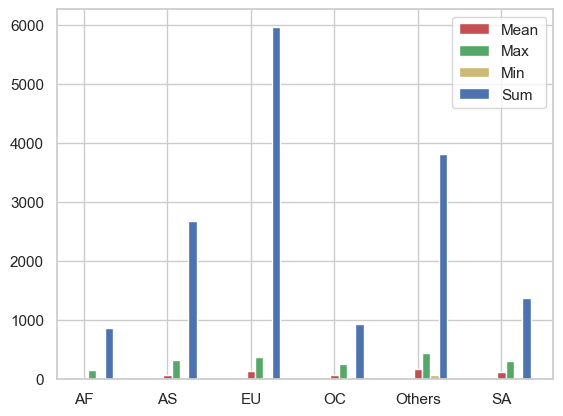

In [30]:
index=np.arange(n_group)
bar_width=0.1

rects1= plt.bar(index, means, bar_width, 
            color ='r',
             label = 'Mean')

rects2= plt.bar(index + bar_width, maxs, bar_width, 
            color ='g',
             label = 'Max')
rects3= plt.bar(index + bar_width*2, mins, bar_width, 
            color ='y',
             label = 'Min')
rects4= plt.bar(index + bar_width*3, sums, bar_width, 
            color ='b',
             label = 'Sum')

plt.xticks(index, spirit.index.tolist())
plt.legend()
plt.show()

In [32]:
'''대륙별 total_litres_of_pure_alcohol 시각화
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
total_mean = drinks.total_litres_of_pure_alcohol.mean()'''

by_continent = continent_mean.index.tolist()
by_continent.append('mean')
by_continent

['AF', 'AS', 'EU', 'OC', 'Others', 'SA', 'mean']

In [36]:
x_pos = np.arange(len(by_continent))
x_pos

array([0, 1, 2, 3, 4, 5, 6])

In [35]:
y_pos = continent_mean.tolist()
y_pos.append(total_mean)
y_pos

[3.0075471698113208,
 2.1704545454545454,
 8.617777777777778,
 3.38125,
 5.995652173913044,
 6.308333333333334,
 4.717098445595855]

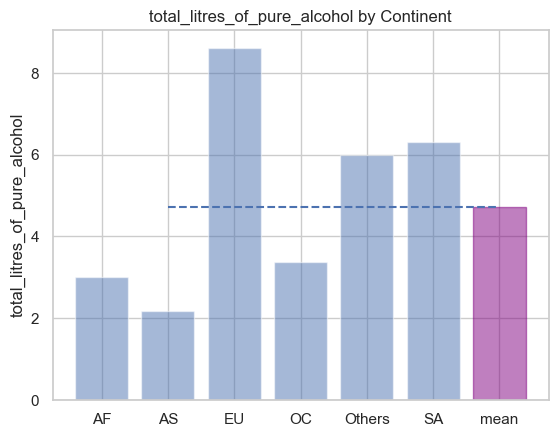

In [43]:
bar_list = plt.bar(x_pos, y_pos, align='center', alpha=0.5)
bar_list[len(by_continent)-1].set_color('purple')

plt.plot([1.,6],[total_mean, total_mean],"--")
plt.xticks(x_pos, by_continent)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [ ]:
''' 대률별 beer_servings 시각화'''

In [44]:
beer_g = drinks.groupby('continent')['beer_servings'].sum()
by_cont=beer_g.index.tolist()
by_cont

['AF', 'AS', 'EU', 'OC', 'Others', 'SA']

In [45]:
xx_pos=np.arange(len(by_cont))
yy_pos=beer_g.tolist()

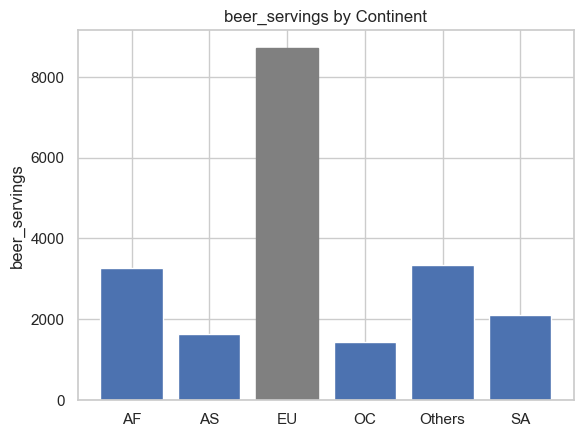

In [48]:
bar_list1=plt.bar(xx_pos, yy_pos, align='center', alpha=1)
bar_list1[by_cont.index('EU')].set_color('gray')
plt.xticks(xx_pos, by_cont)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

In [49]:
'''한국의 음주 랭킹'''
drinks['total_servings'] = drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate']= drinks['alcohol_rate'].fillna(0)

In [51]:
country_rank = drinks[['country','alcohol_rate']]
country_rank = country_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


(0.0, 200.0, 0.0, 0.3)

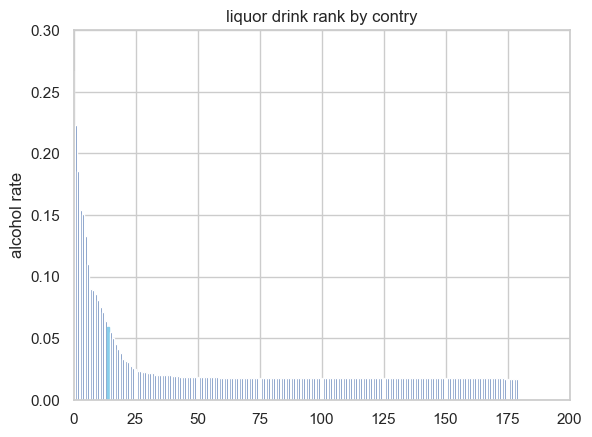

In [55]:
country_list = country_rank.country.tolist()
x2pos= np.arange(len(country_list))
y2pos=country_rank.alcohol_rate.tolist()

barlist=plt.bar(x2pos, y2pos)
barlist[country_list.index('South Korea')].set_color('skyblue')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

